In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
df=pd.read_csv('KUfacility_register_data_for_uploadWAISWAetalPLOSONE82020.csv')

In [3]:
df.shape


(61018, 22)

# Taking columns that are important for prediction

In [4]:
df_new= df[['country', 'facility_coded', 'referral_in','sex','multiple','bba', 'doc_abortion', 'doc_iufd','mothers_age_cat',
          'c_cat_ga','c_cat_bw','c_birth_outcome','c_birth_weight_g2']]

# Looking into the dataset

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61018 entries, 0 to 61017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            61018 non-null  int64  
 1   facility_coded     61018 non-null  object 
 2   referral_in        36636 non-null  object 
 3   sex                47357 non-null  object 
 4   multiple           59472 non-null  float64
 5   bba                61018 non-null  int64  
 6   doc_abortion       61018 non-null  int64  
 7   doc_iufd           670 non-null    float64
 8   mothers_age_cat    61018 non-null  object 
 9   c_cat_ga           49974 non-null  object 
 10  c_cat_bw           47194 non-null  object 
 11  c_birth_outcome    61018 non-null  object 
 12  c_birth_weight_g2  47194 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 6.1+ MB


In [6]:
df.columns

Index(['id', 'country', 'facility_coded', 'referral_in', 'apgar_1', 'apgar_5',
       'sex', 'baby_discharge_status', 'multiple', 'bba', 'doc_abortion',
       'doc_iufd', 'record_type', 'mothers_age_cat', 'c_mother_status',
       'c_cat_ga', 'c_cat_bw', 'c_mode_of_delivery', 'quarter',
       'c_baby_status', 'c_birth_outcome', 'c_birth_weight_g2'],
      dtype='object')

In [7]:
df.describe()

,id,country,apgar_1,apgar_5,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2
count,61018.000000,61018.000000,46415.000000,40699.000000,59472.000000,61018.000000,61018.000000,670.0,47194.000000
mean,146142.819824,1.692369,8.068642,9.148210,1.035378,0.009931,0.042102,1.0,3098.569733
std,38806.591051,0.461516,1.905134,1.760557,0.190383,0.099162,0.200824,0.0,690.806056
min,71291.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,114222.250000,1.000000,8.000000,9.000000,1.000000,0.000000,0.000000,1.0,2800.000000
50%,141711.500000,2.000000,9.000000,10.000000,1.000000,0.000000,0.000000,1.0,3100.000000
75%,191869.750000,2.000000,9.000000,10.000000,1.000000,0.000000,0.000000,1.0,3500.000000
max,228111.000000,2.000000,10.000000,10.000000,3.000000,1.000000,1.000000,1.0,38800.000000


In [8]:
#Taking look at the target variable
df_new['c_birth_outcome'].value_counts()

Born_Alive     56588
Still_Birth     4430
Name: c_birth_outcome, dtype: int64

In [9]:
df_new.c_birth_outcome.value_counts() / len(df_new) * 100

Born_Alive     92.739847
Still_Birth     7.260153
Name: c_birth_outcome, dtype: float64

In [10]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0


In [11]:
df_new.tail()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
61013,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0
61014,1,HF023,NaN,Male,1.0,0,0,NaN,missing,34-36wks,3000-3499g,Born_Alive,3100.0
61015,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3500g+,Born_Alive,3600.0
61016,1,HF023,NaN,NaN,1.0,0,0,NaN,missing,NaN,NaN,Born_Alive,NaN
61017,1,HF023,NaN,Male,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0


In [12]:
# Investigate all the elements whithin each Feature 

for column in df_new:
    unique_vals = df_new[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature country :2 -- [2 1]
The number of values for feature facility_coded :23
The number of values for feature referral_in :4 -- ['1' nan '0' 'yes']
The number of values for feature sex :4 -- ['Male' nan 'Female' 'Not_indicated']
The number of values for feature multiple :4 -- [ 1. nan  2.  3.]
The number of values for feature bba :2 -- [0 1]
The number of values for feature doc_abortion :2 -- [0 1]
The number of values for feature doc_iufd :2 -- [nan  1.]
The number of values for feature mothers_age_cat :6 -- ['≤19' '20-24' '25-29' '30-34' '≥35' 'missing']
The number of values for feature c_cat_ga :7 -- ['28-30wks' nan '37wks+' '34-36wks' '<24wks' '31-33wks' '24-27wks']
The number of values for feature c_cat_bw :9 -- ['1000-1499g' nan '3000-3499g' '2500-2999g' '3500g+' '2000-2499g'
 '1500-1999g' '<500g' '500-999g']
The number of values for feature c_birth_outcome :2 -- ['Born_Alive' 'Still_Birth']
The number of values for feature c_birth_weight_g2 :70


# Handiling missing values

In [13]:
#How many null values each feature contains in terms of percentage
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
doc_iufd             98.901963
dtype: float64

<AxesSubplot:>

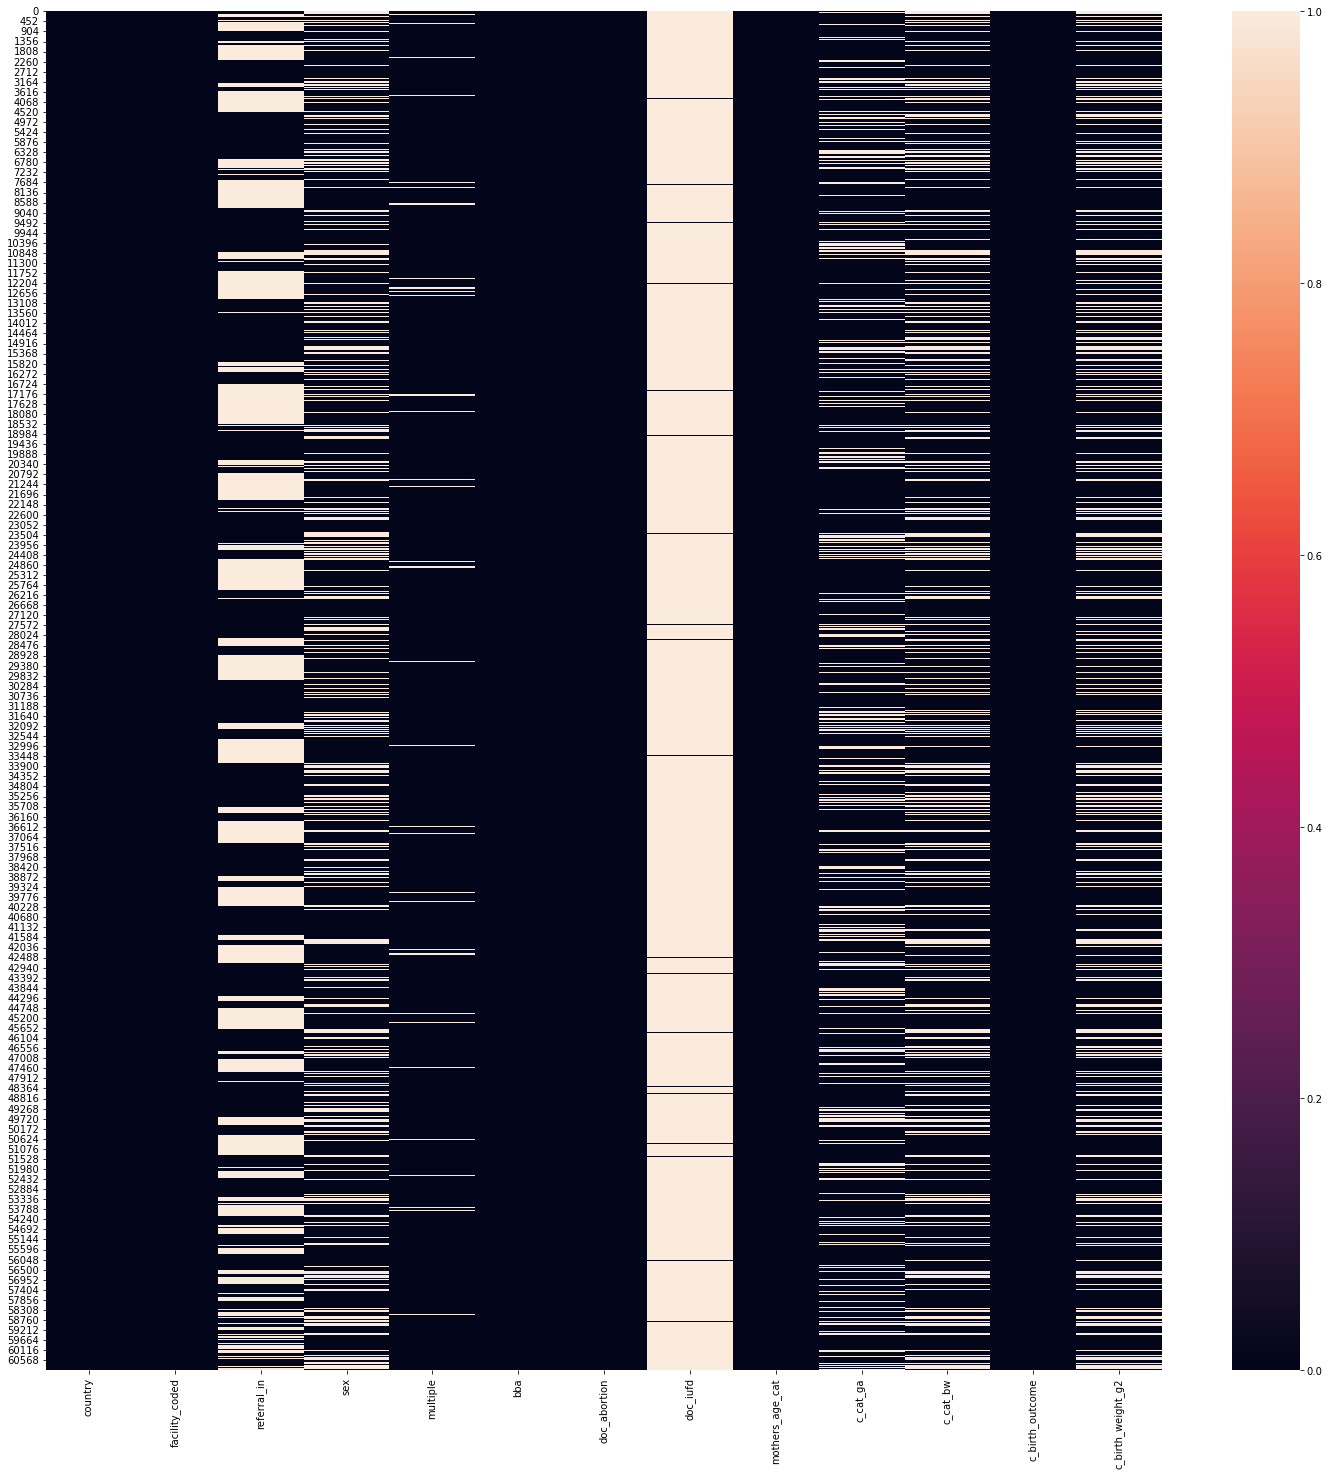

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.isnull())

In [15]:
df_new.shape

(61018, 13)

In [16]:
df_new.drop_duplicates()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61013,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0
61014,1,HF023,NaN,Male,1.0,0,0,NaN,missing,34-36wks,3000-3499g,Born_Alive,3100.0
61015,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3500g+,Born_Alive,3600.0
61016,1,HF023,NaN,NaN,1.0,0,0,NaN,missing,NaN,NaN,Born_Alive,NaN


In [17]:
df_new['doc_iufd'].value_counts()

1.0    670
Name: doc_iufd, dtype: int64

In [18]:
df_new['doc_iufd'] = np.where(df_new['doc_iufd'].isnull(),0,1)

In [19]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
doc_iufd              0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
dtype: float64

In [20]:
df_new.isnull().sum().sort_values(ascending=False)

referral_in          24382
c_cat_bw             13824
c_birth_weight_g2    13824
sex                  13661
c_cat_ga             11044
multiple              1546
country                  0
facility_coded           0
bba                      0
doc_abortion             0
doc_iufd                 0
mothers_age_cat          0
c_birth_outcome          0
dtype: int64

In [21]:
df_new['c_cat_bw'].value_counts()

3000-3499g    18377
3500g+        13196
2500-2999g    10653
2000-2499g     2864
1500-1999g     1256
1000-1499g      584
500-999g        215
<500g            49
Name: c_cat_bw, dtype: int64

In [22]:
df_new['sex'].value_counts()

Male             24251
Female           22734
Not_indicated      372
Name: sex, dtype: int64

In [23]:
df_new['c_cat_ga'].value_counts()

37wks+      39417
34-36wks     4954
<24wks       2086
28-30wks     1461
31-33wks     1319
24-27wks      737
Name: c_cat_ga, dtype: int64

In [24]:
df_new['multiple'].value_counts()

1.0    57431
2.0     1978
3.0       63
Name: multiple, dtype: int64

In [25]:
#Replaceing the missing values of features c_cat_bw,sex,c_cat_ga,multiple with the most frequent values
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [26]:
for feature in ['c_cat_bw','sex','c_cat_ga','multiple']:
    impute_nan(df_new,feature)

In [27]:
df_new.isnull().sum().sort_values(ascending=False)

referral_in          24382
c_birth_weight_g2    13824
country                  0
facility_coded           0
sex                      0
multiple                 0
bba                      0
doc_abortion             0
doc_iufd                 0
mothers_age_cat          0
c_cat_ga                 0
c_cat_bw                 0
c_birth_outcome          0
dtype: int64

In [28]:
#Using random sample technique for handiling missing values of c_birt_weight_g2
df['c_birth_weight_g2'].dropna().sample(df['c_birth_weight_g2'].isnull().sum(),random_state=0)

51635    3000.0
53168    3600.0
52240    3100.0
52084    3900.0
46324    3600.0
          ...  
50194    3000.0
30027    3400.0
6486     3000.0
13904    4000.0
15035    3100.0
Name: c_birth_weight_g2, Length: 13824, dtype: float64

In [29]:
def impute_nan(df,variable):
    df[variable+"_"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_']=random_sample

In [30]:
impute_nan(df_new,"c_birth_weight_g2")

In [31]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [32]:
print(df_new['c_birth_weight_g2'].std())
print(df_new['c_birth_weight_g2_'].std())

690.8060562662702
681.7995266288918


In [33]:
df_new.isnull().mean().sort_values(ascending=True)*100

country                0.000000
facility_coded         0.000000
sex                    0.000000
multiple               0.000000
bba                    0.000000
doc_abortion           0.000000
doc_iufd               0.000000
mothers_age_cat        0.000000
c_cat_ga               0.000000
c_cat_bw               0.000000
c_birth_outcome        0.000000
c_birth_weight_g2_     0.000000
c_birth_weight_g2     22.655610
referral_in           39.958701
dtype: float64

In [34]:
df_new.head(30)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0
5,1,HF008,NaN,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,NaN,3100.0
6,2,HF0005,NaN,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3900.0
7,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,NaN,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3600.0


In [35]:
df_new['referral_in'].value_counts()

0      32302
1       4331
yes        3
Name: referral_in, dtype: int64

In [36]:
#Handiling the missing values of referral_in by creating a new category as its contain large number of missing values
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [37]:
impute_nan(df_new,'referral_in')

In [38]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [39]:
colsToDrop=['c_birth_weight_g2']
df_new.drop(columns = colsToDrop, inplace = True)

In [40]:
df_new.head(100)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,HF0004,0,Female,1.0,0,0,0,≤19,37wks+,2000-2499g,Born_Alive,2300.0
96,2,HF0004,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3200.0
97,2,HF0004,0,Female,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
98,2,HF0004,0,Male,1.0,0,0,0,≤19,28-30wks,3000-3499g,Born_Alive,3100.0


In [41]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.0
facility_coded        0.0
referral_in           0.0
sex                   0.0
multiple              0.0
bba                   0.0
doc_abortion          0.0
doc_iufd              0.0
mothers_age_cat       0.0
c_cat_ga              0.0
c_cat_bw              0.0
c_birth_outcome       0.0
c_birth_weight_g2_    0.0
dtype: float64

<AxesSubplot:>

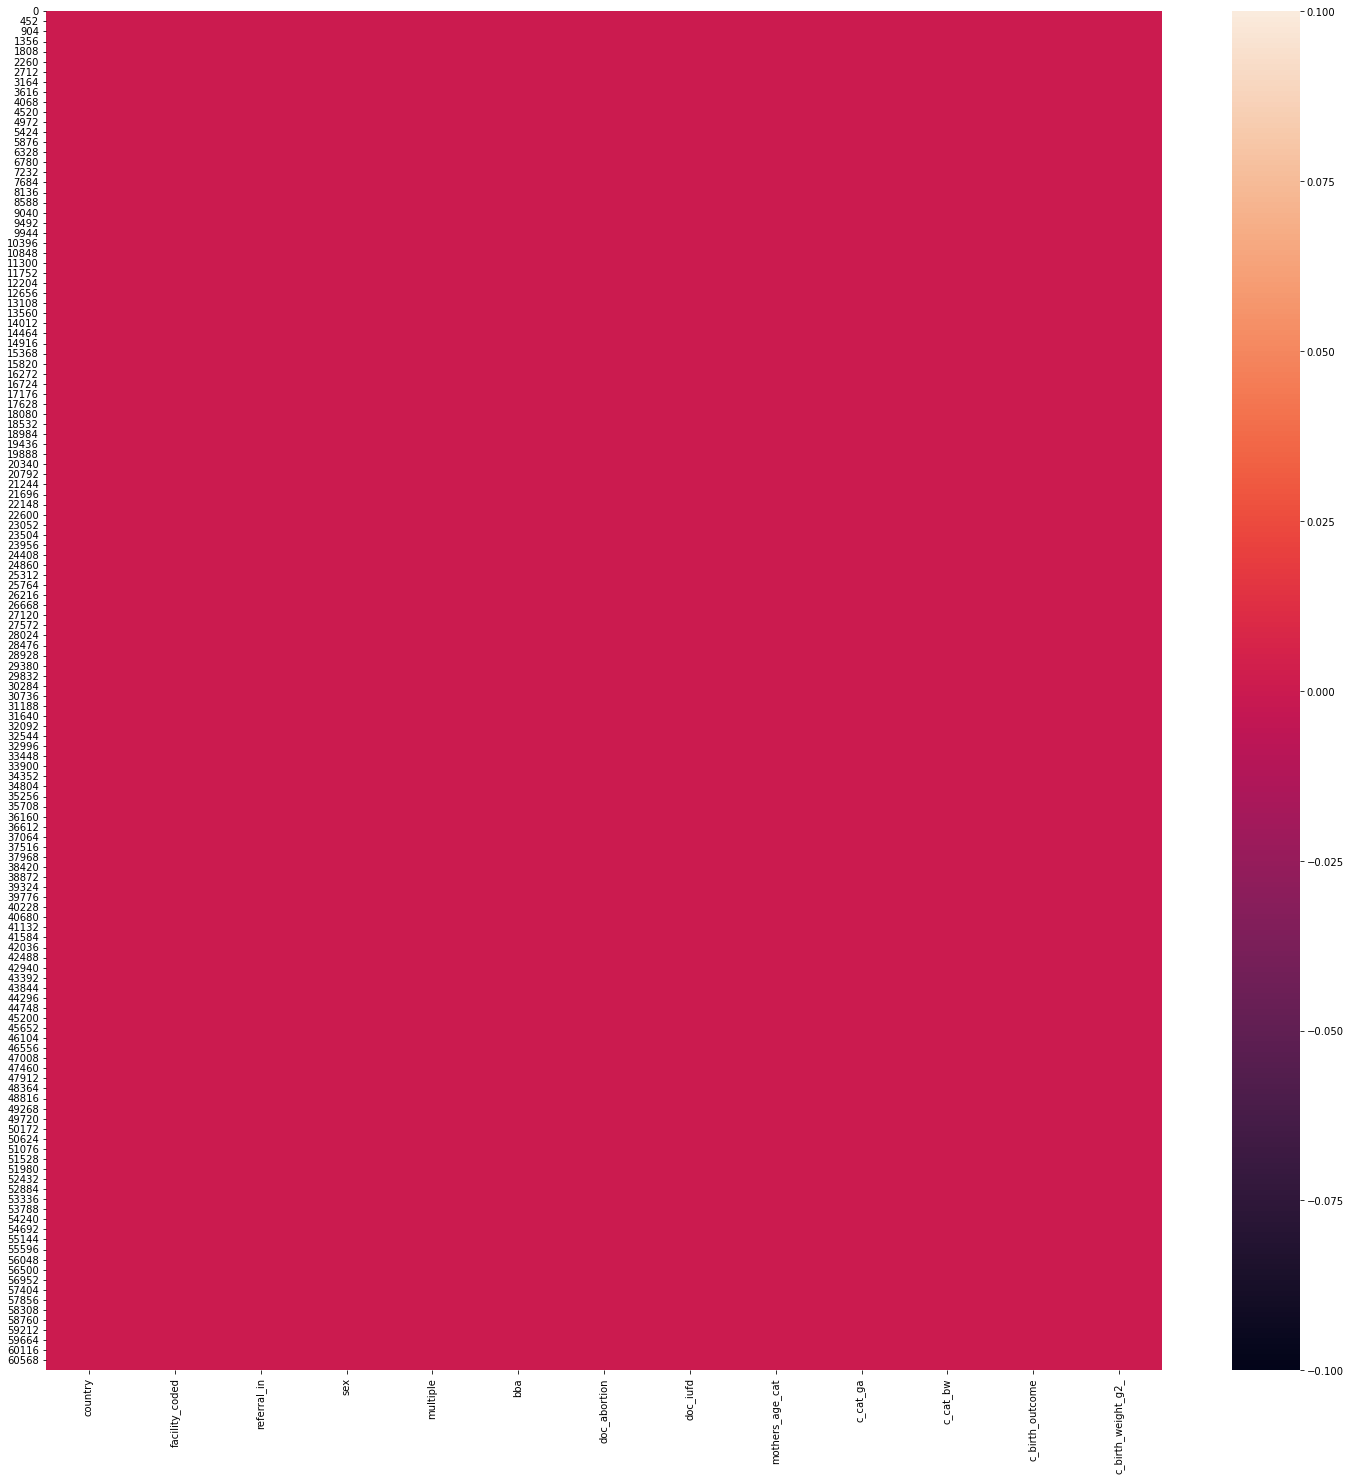

In [42]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.isnull())

In [43]:
df_new.shape

(61018, 13)

In [44]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

# Data visualization

### Counter Plot

In [45]:
df_new['doc_abortion'].value_counts()

0    58449
1     2569
Name: doc_abortion, dtype: int64

In [46]:
df_new['doc_abortion'].value_counts()

0    58449
1     2569
Name: doc_abortion, dtype: int64

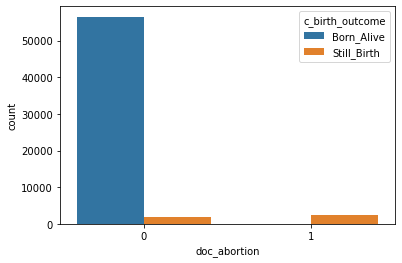

In [47]:
sns.countplot(x = 'doc_abortion', data = df_new,hue='c_birth_outcome');

#### Here mothers those who did abortion before have more numbers still birth then those who did not do any abortion

In [48]:
df_new['mothers_age_cat'].value_counts()

20-24      20898
25-29      13915
≤19        12755
30-34       8187
≥35         4607
missing      656
Name: mothers_age_cat, dtype: int64

In [49]:
df_new.groupby(['mothers_age_cat','c_birth_outcome'])['c_birth_outcome'].count()

mothers_age_cat  c_birth_outcome
20-24            Born_Alive         19622
                 Still_Birth         1276
25-29            Born_Alive         12913
                 Still_Birth         1002
30-34            Born_Alive          7456
                 Still_Birth          731
missing          Born_Alive           594
                 Still_Birth           62
≤19              Born_Alive         11945
                 Still_Birth          810
≥35              Born_Alive          4058
                 Still_Birth          549
Name: c_birth_outcome, dtype: int64

<AxesSubplot:xlabel='mothers_age_cat', ylabel='count'>

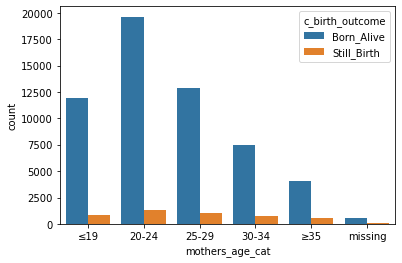

In [50]:
sns.countplot(x = 'mothers_age_cat', data = df_new,hue='c_birth_outcome')

Here we can see the possiblity of still birth occurs much for those mothers whose age are lies between 20 to 24

In [51]:
df_new.groupby(['doc_iufd','c_birth_outcome'])['c_birth_outcome'].count()

doc_iufd  c_birth_outcome
0         Born_Alive         56422
          Still_Birth         3926
1         Born_Alive           166
          Still_Birth          504
Name: c_birth_outcome, dtype: int64

<AxesSubplot:xlabel='doc_iufd', ylabel='count'>

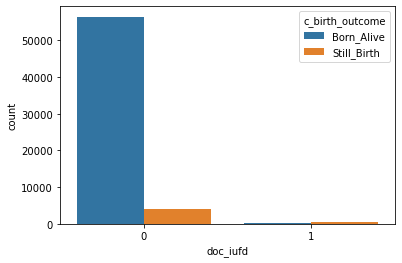

In [421]:
sns.countplot(x = 'doc_iufd', data = df_new,hue='c_birth_outcome')

#### intrauterine fetal death increases the possibility of baby's death after week 20

In [422]:
df_new.groupby(['c_cat_ga','c_birth_outcome'])['c_birth_outcome'].count()

c_cat_ga  c_birth_outcome
24-27wks  Born_Alive           533
          Still_Birth          204
28-30wks  Born_Alive          1258
          Still_Birth          203
31-33wks  Born_Alive          1192
          Still_Birth          127
34-36wks  Born_Alive          4708
          Still_Birth          246
37wks+    Born_Alive         47900
          Still_Birth         2561
<24wks    Born_Alive           997
          Still_Birth         1089
Name: c_birth_outcome, dtype: int64

<AxesSubplot:xlabel='c_cat_ga', ylabel='count'>

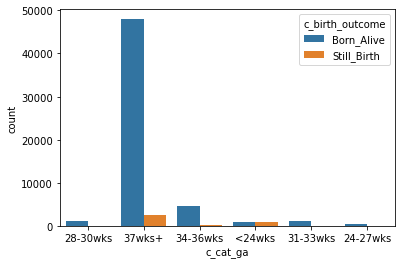

In [423]:
sns.countplot(x = 'c_cat_ga', data = df_new,hue='c_birth_outcome')

#### If gestational age  is below 24 week then we can find approximately 50 percent of still birth and gestational ages  between 24 to 27 weeks ,28 to 30 weeks,more then 37 weeks the still birth occur much.We can also see between 34 to 36 weeks and 31 to 33 weeks still birth occurs less numbers here birth alive possiblity is much higher

# Boxplot


In [440]:
Q1 = df_new['c_birth_weight_g2_'].quantile(0.25)
Q3 = df_new['c_birth_weight_g2_'].quantile(0.75)

In [441]:
IQR = Q3-Q1

In [442]:
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

In [443]:
my_df_new = df_new[(df_new['c_birth_weight_g2_']>lower_limit)&(df_new['c_birth_weight_g2_']<upper_limit)]

In [444]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


<AxesSubplot:xlabel='sex', ylabel='c_birth_weight_g2_'>

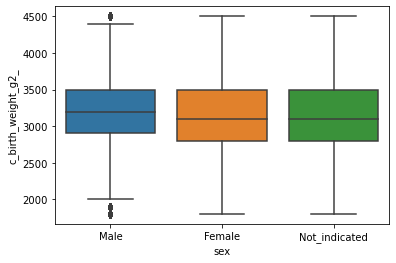

In [445]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', data=my_df_new)

<AxesSubplot:xlabel='sex', ylabel='c_birth_weight_g2_'>

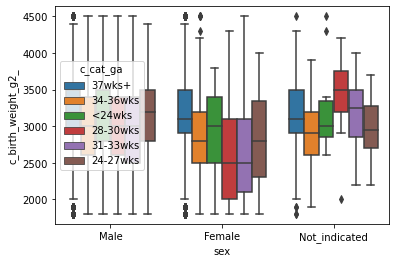

In [446]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', hue='c_cat_ga', data=my_df_new)

Among 'Male' babies, those who have gestational age is 37 weeks+, have comparatively high birth weight mean. Among 'Male' babies, those who have gestational age of 37 weeks+, have comparatively high birth weight mean and those who have 24-27 gestational age, have comparatively lower birth_weight mean. 

In [447]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


<AxesSubplot:xlabel='country', ylabel='c_birth_weight_g2_'>

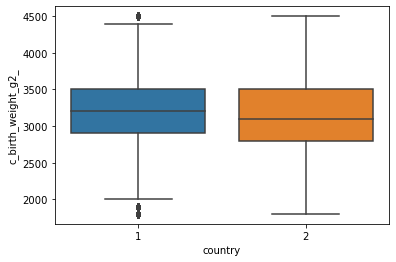

In [448]:
sns.boxplot(y='c_birth_weight_g2_', x='country', data=my_df_new)

<AxesSubplot:xlabel='sex', ylabel='c_birth_weight_g2_'>

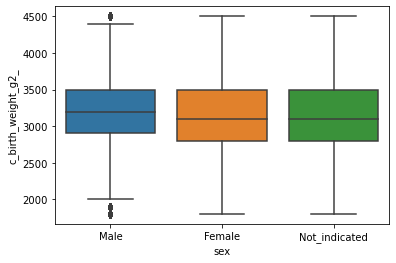

In [449]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', data=my_df_new)

<AxesSubplot:xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

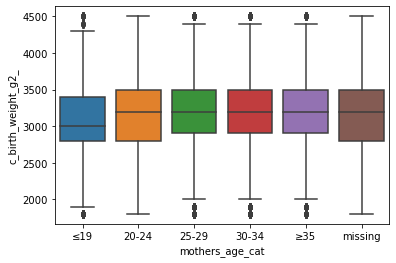

In [450]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', data=my_df_new)

<AxesSubplot:xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

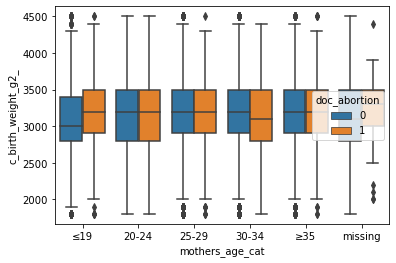

In [451]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', hue='doc_abortion', data=my_df_new)

Mothers with age under 19 and did abortion before, have babies with higher birth weight mean than who did not do abortion before. Mothers who have age between 30 to 34 and did abortion before, have babies with higher birth weight mean than who did before.

<AxesSubplot:xlabel='doc_abortion', ylabel='c_birth_weight_g2_'>

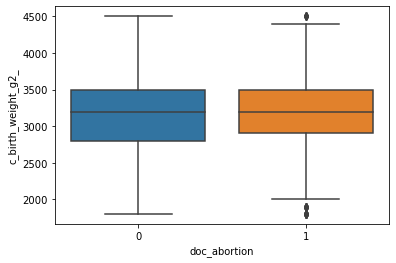

In [452]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_abortion', data=my_df_new)

<AxesSubplot:xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

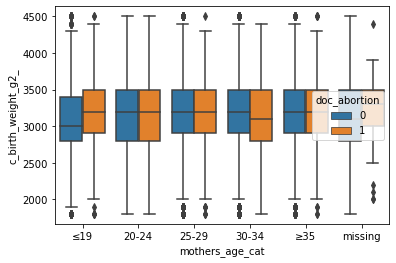

In [453]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', hue='doc_abortion', data=my_df_new)

<AxesSubplot:xlabel='c_cat_ga', ylabel='c_birth_weight_g2_'>

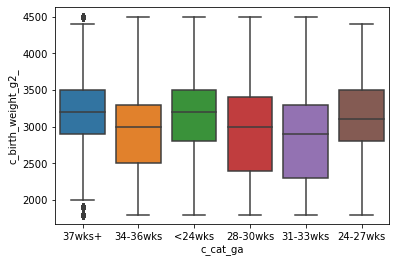

In [454]:
sns.boxplot(y='c_birth_weight_g2_', x='c_cat_ga', data=my_df_new)

<AxesSubplot:xlabel='bba', ylabel='c_birth_weight_g2_'>

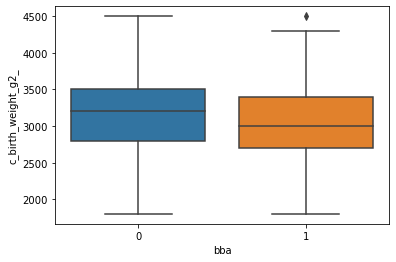

In [455]:
sns.boxplot(y='c_birth_weight_g2_', x='bba', data=my_df_new)

<AxesSubplot:xlabel='doc_iufd', ylabel='c_birth_weight_g2_'>

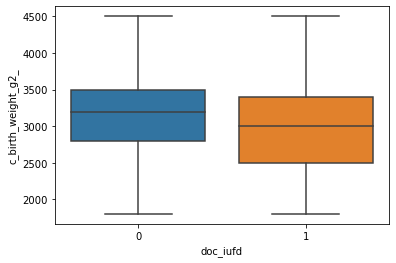

In [456]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_iufd', data=my_df_new)

Babies who were born before arrival at the facility, has lower birth weight than babies who were born after arrival at the facility

# Histplot

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

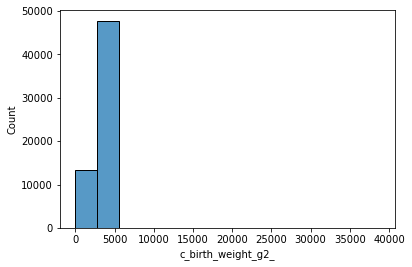

In [457]:
sns.histplot(x='c_birth_weight_g2_', data=df_new, bins=14)

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

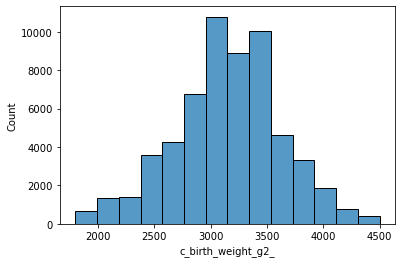

In [458]:
sns.histplot(x='c_birth_weight_g2_', data=my_df_new, bins=14)

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

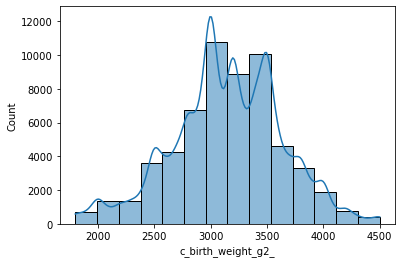

In [459]:
sns.histplot(x='c_birth_weight_g2_', data=my_df_new, bins=14, kde=True)

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Probability'>

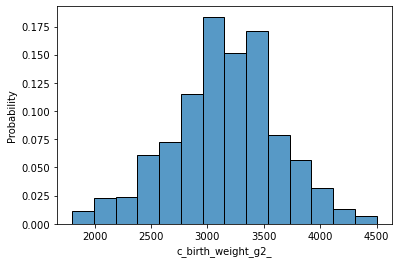

In [460]:
sns.histplot(x='c_birth_weight_g2_', data=my_df_new, bins=14, stat='probability')

Probability that a baby's birth will be near to 3000 grams is high.

In [461]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

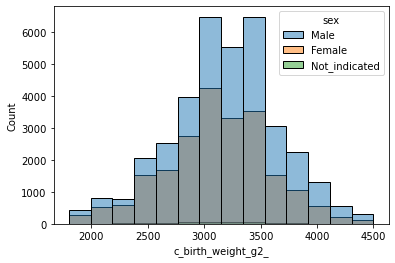

In [462]:
sns.histplot(x='c_birth_weight_g2_', hue='sex', bins=14, data=my_df_new)

Male babies are with more birth weight

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

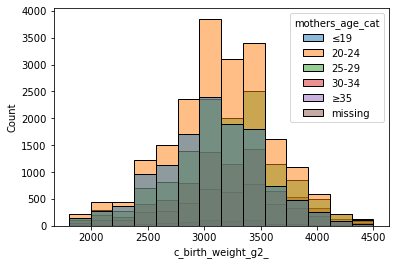

In [463]:
sns.histplot(x='c_birth_weight_g2_', hue='mothers_age_cat', bins=14, data=my_df_new)

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

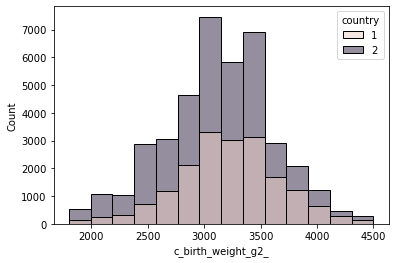

In [464]:
sns.histplot(x='c_birth_weight_g2_', hue='country', bins=14, data=my_df_new)

<AxesSubplot:xlabel='c_birth_weight_g2_', ylabel='Count'>

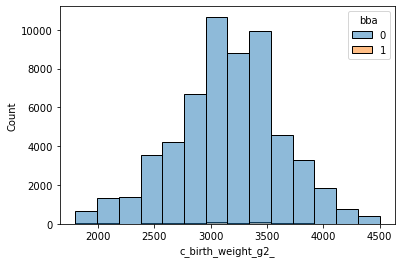

In [465]:
sns.histplot(x='c_birth_weight_g2_', hue='bba', bins=14, data=my_df_new)

Babies from country 2 has higher birth weight

Mothers with age from 20-24 have babies with higher weight

# Feature selection with pearson correlation

In [466]:
df_new.head(10)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0
6,2,HF0005,Missing,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3900.0
7,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3600.0


In [467]:
df_new.shape

(61018, 13)

In [468]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

In [469]:
y = df_new['c_birth_outcome']
X = df_new.drop(columns = 'c_birth_outcome')

In [470]:
X.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2800.0


In [471]:
y.head()#stratify = y

0    Born_Alive
1    Born_Alive
2    Born_Alive
3    Born_Alive
4    Born_Alive
Name: c_birth_outcome, dtype: object

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20,stratify = y)

In [473]:
%matplotlib inline

In [474]:
X_train.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
55456,2,HF0006,1,Male,1.0,0,0,0,30-34,37wks+,3000-3499g,3300.0
1452,2,HF0006,0,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,3200.0
57469,2,HF0004,0,Female,1.0,0,0,0,≥35,34-36wks,3500g+,3600.0
48996,2,HF0004,0,Female,1.0,0,0,0,30-34,37wks+,2500-2999g,2700.0
33857,2,HF0001,0,Female,1.0,0,0,0,25-29,37wks+,3000-3499g,3400.0


In [475]:
corr = X_train.corr()
corr

,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2_
country,1.000000,0.093419,0.010066,0.110334,0.026226,-0.079801
multiple,0.093419,1.000000,0.031220,-0.034130,-0.004276,-0.217765
bba,0.010066,0.031220,1.000000,-0.019859,-0.010700,-0.053499
doc_abortion,0.110334,-0.034130,-0.019859,1.000000,0.001706,-0.029499
doc_iufd,0.026226,-0.004276,-0.010700,0.001706,1.000000,-0.069005
c_birth_weight_g2_,-0.079801,-0.217765,-0.053499,-0.029499,-0.069005,1.000000


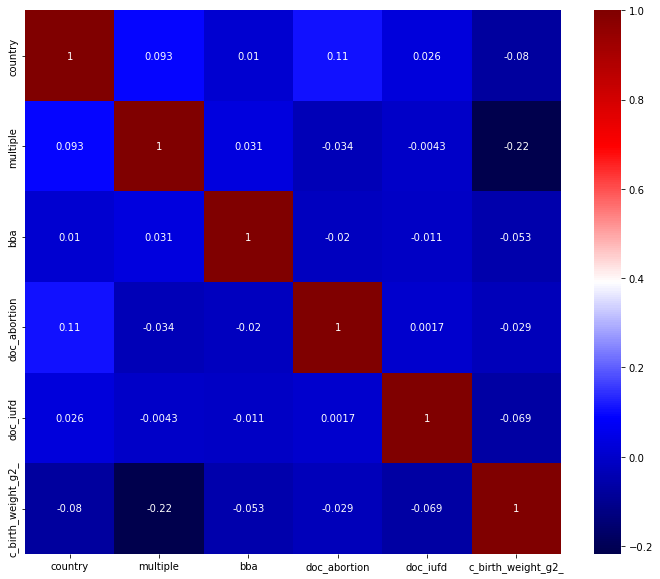

In [476]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

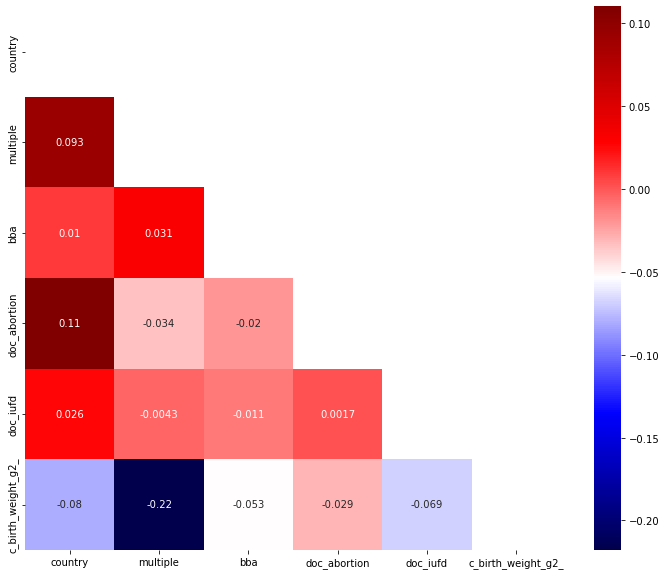

In [477]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [478]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [479]:
corr_features = correlation(X_train, 0.9) 
print(len(corr_features))
print(corr_features)

0
set()


#  Separate the independent (X) and dependent (y) features

In [52]:
# Separate the independent (X) and dependent (y) features
y = df_new['c_birth_outcome']
X = df_new.drop(columns = 'c_birth_outcome')


In [53]:
X.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2800.0


In [54]:
df_new.c_birth_outcome.value_counts() / len(df_new) * 100

Born_Alive     92.739847
Still_Birth     7.260153
Name: c_birth_outcome, dtype: float64

# Finding features with numeric values

In [55]:
numerical_features = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_new[numerical_features].head()

Number of numerical variables:  6


,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2_
0,2,1.0,0,0,0,1400.0
1,2,1.0,0,0,0,3000.0
2,2,1.0,0,0,0,3600.0
3,1,1.0,0,0,0,3000.0
4,1,1.0,0,0,0,2800.0


In [56]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

# Making numeric representation of categorical variables

In [57]:
new_raw_data = pd.get_dummies(df_new, columns = ['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw'])
print(new_raw_data.shape)
new_raw_data.head()

(61018, 63)


,c_birth_outcome,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,...,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1000-1499g,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+,c_cat_bw_500-999g,c_cat_bw_<500g
0,Born_Alive,1400.0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Born_Alive,3000.0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,Born_Alive,3600.0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,Born_Alive,3000.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Born_Alive,2800.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# Splitting the Raw Data - train-test validation

In [58]:
X = new_raw_data.drop(columns = 'c_birth_outcome').values# Input features (attributes)
y = new_raw_data['c_birth_outcome'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0,stratify=y)

X shape: (61018, 62)
y shape: (61018,)


# ZeroR classifier

In [59]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.93      1.00      0.96     11318
 Still_Birth       0.00      0.00      0.00       886

    accuracy                           0.93     12204
   macro avg       0.46      0.50      0.48     12204
weighted avg       0.86      0.93      0.89     12204

Train Accuracy:  0.9273978776580489
Test Accuracy :  0.9274008521796132


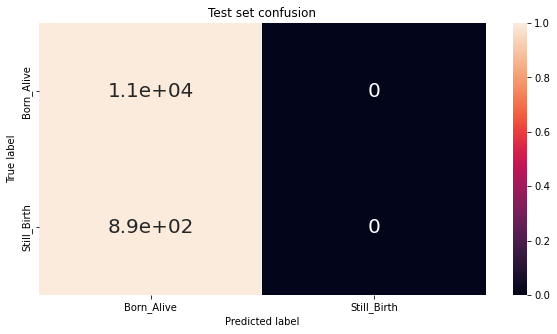

In [66]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

              precision    recall  f1-score   support

  Born_Alive       0.93      1.00      0.96     45270
 Still_Birth       0.00      0.00      0.00      3544

    accuracy                           0.93     48814
   macro avg       0.46      0.50      0.48     48814
weighted avg       0.86      0.93      0.89     48814



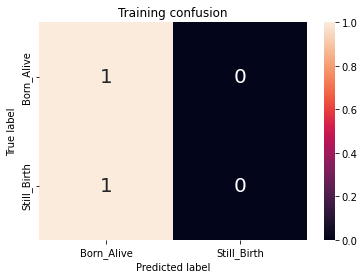

In [373]:
y_pred = dummy_clf.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dummy_clf.classes_, title='Training confusion')
print(classification_report(y_train, y_pred))

# Decision tree without oversampling and hyper parameter tuning

In [325]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.97      0.99      0.98     11318
 Still_Birth       0.81      0.66      0.73       886

    accuracy                           0.96     12204
   macro avg       0.89      0.82      0.85     12204
weighted avg       0.96      0.96      0.96     12204

Train Accuracy:  0.9848813864874831
Test Accuracy :  0.9638643067846607


In [326]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

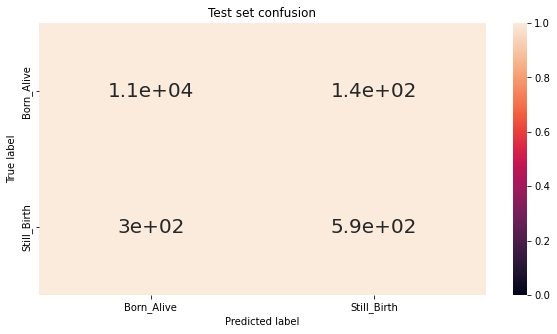

In [327]:
y_pred = clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

In [328]:
cm

array([[11177,   141],
       [  300,   586]], dtype=int64)

Depth =  2 , Training Accuracy =  0.9730405211619617 , Test Accuracy =  0.9715666994428056 , Diff =  0.14738217191561098  %
Depth =  3 , Training Accuracy =  0.9731429507928053 , Test Accuracy =  0.9715666994428056 , Diff =  0.15762513499997244  %
Depth =  4 , Training Accuracy =  0.9736550989470234 , Test Accuracy =  0.9723041625696492 , Diff =  0.13509363773741567  %
Depth =  5 , Training Accuracy =  0.973900930061048 , Test Accuracy =  0.9728777450016388 , Diff =  0.10231850594092373  %
Depth =  6 , Training Accuracy =  0.9741467611750727 , Test Accuracy =  0.9728777450016388 , Diff =  0.126901617343389  %
Depth =  7 , Training Accuracy =  0.974638423403122 , Test Accuracy =  0.972058341527368 , Diff =  0.2580081875753981  %
Depth =  8 , Training Accuracy =  0.975232515262015 , Test Accuracy =  0.9727138643067846 , Diff =  0.2518650955230406  %
Depth =  9 , Training Accuracy =  0.9757241774900643 , Test Accuracy =  0.972058341527368 , Diff =  0.3665835962696318  %
Depth =  10 , Trai

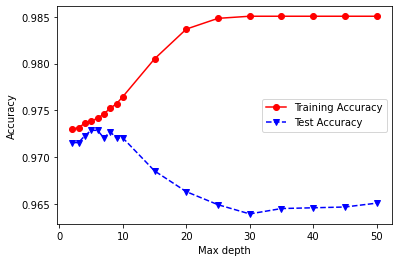

# Using decision tree with only oversampling

In [139]:
from imblearn.over_sampling import RandomOverSampler

In [140]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

In [142]:
dlf=DecisionTreeClassifier(max_depth=5)
dlf.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=5)

In [143]:
y_pred=dlf.predict(X_test)

print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.98      0.95      0.97     11318
 Still_Birth       0.55      0.75      0.63       886

    accuracy                           0.94     12204
   macro avg       0.76      0.85      0.80     12204
weighted avg       0.95      0.94      0.94     12204

Train Accuracy:  0.974638423403122
Test Accuracy :  0.9367420517862995


In [144]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

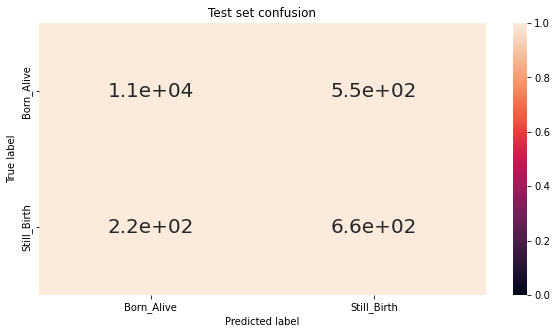

In [145]:

y_pred = dlf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dlf.classes_, title='Test set confusion')


In [146]:
cm

array([[10771,   547],
       [  225,   661]], dtype=int64)

Depth =  2 , Training Accuracy =  0.9730405211619617 , Test Accuracy =  0.9715666994428056 , Diff =  0.14738217191561098  %
Depth =  3 , Training Accuracy =  0.9731429507928053 , Test Accuracy =  0.9715666994428056 , Diff =  0.15762513499997244  %
Depth =  4 , Training Accuracy =  0.9736550989470234 , Test Accuracy =  0.9723041625696492 , Diff =  0.13509363773741567  %
Depth =  5 , Training Accuracy =  0.973900930061048 , Test Accuracy =  0.9728777450016388 , Diff =  0.10231850594092373  %
Depth =  6 , Training Accuracy =  0.9741467611750727 , Test Accuracy =  0.9728777450016388 , Diff =  0.126901617343389  %
Depth =  7 , Training Accuracy =  0.974638423403122 , Test Accuracy =  0.9721402818747952 , Diff =  0.2498141528326836  %
Depth =  8 , Training Accuracy =  0.975232515262015 , Test Accuracy =  0.9727138643067846 , Diff =  0.2518650955230406  %
Depth =  9 , Training Accuracy =  0.9756832056377269 , Test Accuracy =  0.971976401179941 , Diff =  0.3706804457785928  %
Depth =  10 , Tra

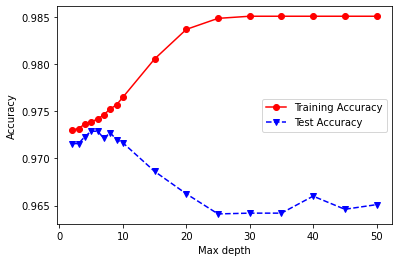

In [126]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

# Decision Tree using over sampling and hyper paramaters tuning

In [379]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [380]:
from sklearn.model_selection import RandomizedSearchCV
max_depth= [2, 3, 5, 10]
min_samples_leaf= [1,2, 3,4,5,8, 10,14, 20, 50, 100]
min_samples_split = [1,2, 5,6,8,10,12,14,20,50,100]
max_features = ['auto', 'sqrt','log2']
criterion= ["gini", "entropy"]
splitter=["best", "random"]

random_grid = {'max_depth':max_depth,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter':splitter,
              'criterion':criterion}
print(random_grid)




{'max_depth': [2, 3, 5, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 2, 5, 6, 8, 10, 12, 14, 20, 50, 100], 'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10, 14, 20, 50, 100], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']}


In [381]:
from imblearn.over_sampling import RandomOverSampler

In [382]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

In [383]:
df_O_H=DecisionTreeClassifier()
df_randomcv=RandomizedSearchCV(estimator=df_O_H,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model

df_randomcv.fit(X_train_ns,y_train_ns)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 8,
                                                             10, 14, 20, 50,
                                                             100],
                                        'min_samples_split': [1, 2, 5, 6, 8, 10,
                                                              12, 14, 20, 50,
                                                              100],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [384]:
df_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [385]:
df_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 8,
                                                             10, 14, 20, 50,
                                                             100],
                                        'min_samples_split': [1, 2, 5, 6, 8, 10,
                                                              12, 14, 20, 50,
                                                              100],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [392]:
df_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5)

In [393]:
#df_ran=DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features='auto',min_samples_split= 8,
 #min_samples_leaf= 1,
                       #splitter='random')
#df_ran.fit(X_train_ns,y_train_ns)

In [394]:

best_random_grid_df=df_randomcv.best_estimator_

In [395]:
y_pred=best_random_grid_df.predict(X_test)

print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, best_random_grid_df.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.97      0.94      0.96     11318
 Still_Birth       0.48      0.65      0.55       886

    accuracy                           0.92     12204
   macro avg       0.73      0.80      0.76     12204
weighted avg       0.94      0.92      0.93     12204

Train Accuracy:  0.9276232228459048
Test Accuracy :  0.9236315961979679


In [396]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

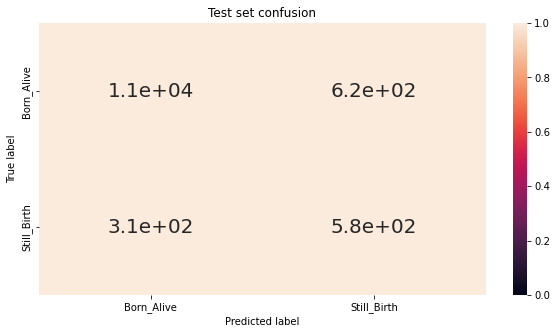

In [397]:
y_pred = best_random_grid_df.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

In [398]:
cm

array([[10693,   625],
       [  307,   579]], dtype=int64)

              precision    recall  f1-score   support

  Born_Alive       0.97      0.95      0.96     45270
 Still_Birth       0.50      0.67      0.57      3544

    accuracy                           0.93     48814
   macro avg       0.74      0.81      0.77     48814
weighted avg       0.94      0.93      0.93     48814



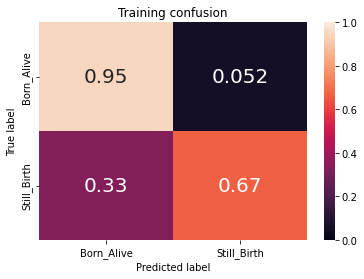

In [399]:
y_pred = best_random_grid_df.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=best_random_grid_df.classes_, title='Training confusion')
print(classification_report(y_train, y_pred))

### GridSearch CV

In [400]:
df_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [401]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [df_randomcv.best_params_['criterion']],
    'max_depth': [df_randomcv.best_params_['max_depth']],
    'max_features': [df_randomcv.best_params_['max_features']],
    'min_samples_leaf': [df_randomcv.best_params_['min_samples_leaf'], 
                         df_randomcv.best_params_['min_samples_leaf']+2, 
                         df_randomcv.best_params_['min_samples_leaf'] + 4,
                         df_randomcv.best_params_['min_samples_leaf'] + 6,
                         df_randomcv.best_params_['min_samples_leaf'] + 8,
                         df_randomcv.best_params_['min_samples_leaf'] + 10],
                         
    
    'min_samples_split': [df_randomcv.best_params_['min_samples_split'] - 6,
                          df_randomcv.best_params_['min_samples_split'] - 4,
                          df_randomcv.best_params_['min_samples_split'] - 2,
                          df_randomcv.best_params_['min_samples_split'] - 1,
                          df_randomcv.best_params_['min_samples_split'], 
                          df_randomcv.best_params_['min_samples_split'] +1,
                          df_randomcv.best_params_['min_samples_split'] + 2,
                          df_randomcv.best_params_['min_samples_split'] +4,
                          df_randomcv.best_params_['min_samples_split'] +6],
    'splitter': [df_randomcv.best_params_['splitter']]
    
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8, 10, 12, 14], 'min_samples_split': [-1, 1, 3, 4, 5, 6, 7, 9, 11], 'splitter': ['best']}


In [402]:
df_O_H=DecisionTreeClassifier()
grid_search_df=GridSearchCV(estimator=df_O_H,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_df.fit(X_train_ns,y_train_ns)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [-1, 1, 3, 4, 5, 6, 7, 9, 11],
                         'splitter': ['best']},
             verbose=2)

In [403]:
best_grid_df=grid_search_df.best_estimator_

In [404]:
best_grid_df

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=4, min_samples_split=4)

In [405]:
#DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='log2',
                      # min_samples_split=4)

In [406]:
#df_2 = DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='log2', #min_samples_split=5) #df_grid.fit(X_train_ns,y_train_ns)

In [407]:
#DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='log2',
                       #min_samples_split=5)

In [408]:

#df_grid=DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features='auto',
                       #min_samples_split=3, splitter='random')
#df_grid.fit(X_train_ns,y_train_ns)


In [409]:
y_pred=best_grid_df.predict(X_test)
print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, best_grid_df.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.98      0.97      0.97     11318
 Still_Birth       0.62      0.70      0.65       886

    accuracy                           0.95     12204
   macro avg       0.80      0.83      0.81     12204
weighted avg       0.95      0.95      0.95     12204

Train Accuracy:  0.947002909001516
Test Accuracy :  0.9464110127826942


In [186]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

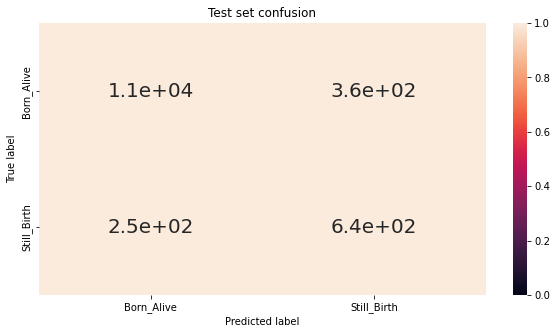

In [187]:

y_pred = best_grid_df.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=best_grid_df.classes_, title='Test set confusion')

In [188]:
cm

array([[10958,   360],
       [  248,   638]], dtype=int64)

              precision    recall  f1-score   support

  Born_Alive       0.98      0.68      0.80     45270
 Still_Birth       0.17      0.83      0.28      3544

    accuracy                           0.69     48814
   macro avg       0.57      0.75      0.54     48814
weighted avg       0.92      0.69      0.76     48814



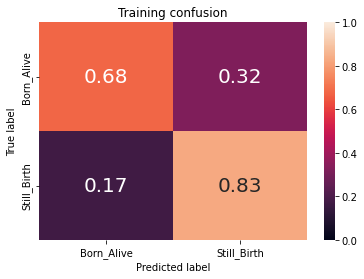

In [376]:
y_pred = best_grid_df.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=best_grid_df.classes_, title='Training confusion')
print(classification_report(y_train, y_pred))

# Random forest using oversampling and hyper-parameter tuining

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model

rf_randomcv.fit(X_train_ns,y_train_ns)

In [ ]:
#rf_ran=RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       #n_estimators=1400)
#rf_ran.fit(X_train_ns,y_train_ns)

In [ ]:
rf_randomcv.best_params_

In [ ]:
rf_randomcv

In [ ]:
rf_randomcv.best_estimator_

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
#{'n_estimators': 600,
 #'min_samples_split': 10,
 #'min_samples_leaf': 8,
 #'max_features': 'auto',
 #'max_depth': 10,
 #'criterion': 'gini'}

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = best_grid_random.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf_ran.classes_, title='Training confusion')

In [ ]:
cm

### GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train_ns,y_train_ns)


In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, best_grid_df.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = best_grid.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=best_grid.classes_, title='Training confusion')

# Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(max_depth=5)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [190]:
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

  Born_Alive       0.97      1.00      0.99     11318
 Still_Birth       0.96      0.66      0.78       886

    accuracy                           0.97     12204
   macro avg       0.97      0.83      0.88     12204
weighted avg       0.97      0.97      0.97     12204

Train Accuracy:  0.9728766337526119
Test Accuracy :  0.9728777450016388


In [420]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

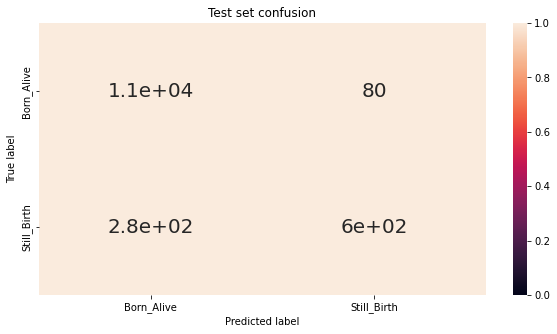

In [204]:
y_pred = classifier.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=classifier.classes_, title='Test set confusion')

In [205]:
cm

array([[11238,    80],
       [  283,   603]], dtype=int64)

# Random Forest using oversampling

In [412]:
from imblearn.over_sampling import RandomOverSampler

In [413]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)


In [414]:
classifier_ov=RandomForestClassifier(max_depth=10)
classifier_ov.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=10)

In [415]:
y_pred=classifier_ov.predict(X_test)
print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, classifier_ov.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

  Born_Alive       0.98      0.99      0.98     11318
 Still_Birth       0.79      0.72      0.75       886

    accuracy                           0.97     12204
   macro avg       0.88      0.85      0.87     12204
weighted avg       0.96      0.97      0.96     12204

Train Accuracy:  0.9700905477936658
Test Accuracy :  0.9656669944280564


In [416]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

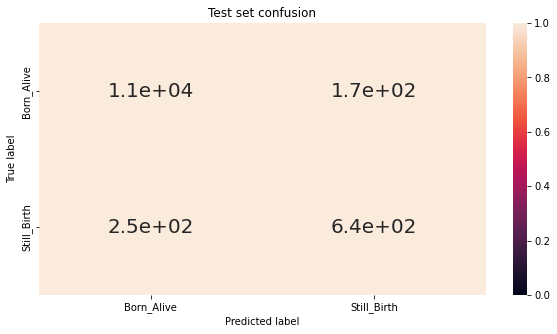

In [417]:
y_pred = classifier_ov.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=classifier_ov.classes_, title='Test set confusion')

In [418]:
cm

array([[11149,   169],
       [  250,   636]], dtype=int64)

              precision    recall  f1-score   support

  Born_Alive       0.98      0.99      0.98     45270
 Still_Birth       0.83      0.74      0.78      3544

    accuracy                           0.97     48814
   macro avg       0.90      0.87      0.88     48814
weighted avg       0.97      0.97      0.97     48814



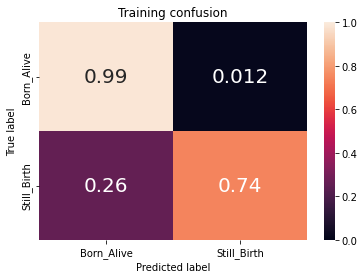

In [419]:
y_pred = classifier_ov.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=classifier_ov.classes_, title='Training confusion')
print(classification_report(y_train, y_pred))

# KNN classifier

In [329]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [330]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

In [331]:
df_new_1 = pd.get_dummies(df_new, columns = ['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw'])

In [332]:
y = df_new_1['c_birth_outcome']
X = df_new_1.drop(columns = 'c_birth_outcome')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [333]:
df_new_1.head()

,c_birth_outcome,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,...,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1000-1499g,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+,c_cat_bw_500-999g,c_cat_bw_<500g
0,Born_Alive,1400.0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Born_Alive,3000.0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,Born_Alive,3600.0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,Born_Alive,3000.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Born_Alive,2800.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [334]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['c_birth_weight_g2_']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [335]:
X_train.head()

,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,facility_coded_HF007,...,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1000-1499g,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+,c_cat_bw_500-999g,c_cat_bw_<500g
55456,0.085052,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1452,0.082474,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
57469,0.092784,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48996,0.069588,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
33857,0.087629,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [336]:
X_test.head()

,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,facility_coded_HF007,...,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1000-1499g,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+,c_cat_bw_500-999g,c_cat_bw_<500g
16417,0.072165,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
57226,0.097938,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
55250,0.090206,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
18520,0.090206,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
45118,0.097938,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [337]:
os = RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)


In [338]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Euclidean Distance Metric
knn_clf.fit(X_train_ns, y_train_ns)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  Born_Alive       0.98      0.93      0.95     11318
 Still_Birth       0.42      0.71      0.53       886

    accuracy                           0.91     12204
   macro avg       0.70      0.82      0.74     12204
weighted avg       0.94      0.91      0.92     12204

Train Accuracy:  0.9354488466423567
Test Accuracy :  0.909210095050803


In [224]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

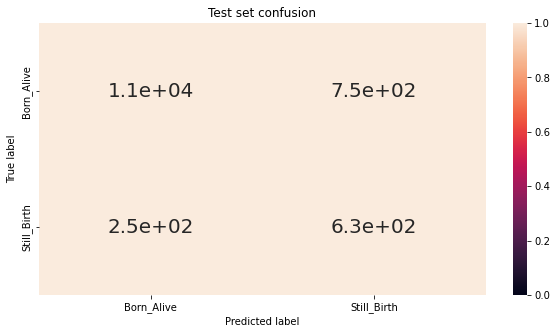

In [226]:
y_pred = knn_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=knn_clf.classes_, title='Test set confusion')


In [227]:
cm

array([[10572,   746],
       [  252,   634]], dtype=int64)

              precision    recall  f1-score   support

  Born_Alive       0.99      0.94      0.96     45270
 Still_Birth       0.53      0.91      0.67      3544

    accuracy                           0.94     48814
   macro avg       0.76      0.93      0.82     48814
weighted avg       0.96      0.94      0.94     48814



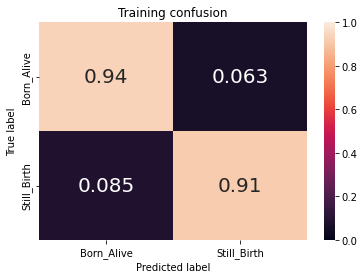

In [410]:
y_pred = knn_clf.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=knn_clf.classes_, title='Training confusion')
print(classification_report(y_train, y_pred))

# AUROC SCROE

In [351]:
from sklearn.datasets import make_classification
import numpy as np

In [352]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [353]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [354]:
r_probs = [0 for _ in range(len(y_test))]

In [355]:
rf_probs = knn_clf.predict_proba(X_test)

In [356]:
nb_probs = best_random_grid_df.predict_proba(X_test)

In [357]:
nb_probs_2 = classifier_ov.predict_proba(X_test)

In [358]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]


In [359]:
nb_probs_2 = nb_probs_2[:, 1]

In [360]:
from sklearn.metrics import roc_curve, roc_auc_score

In [361]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
nb_auc_2 = roc_auc_score(y_test, nb_probs_2)

In [362]:
#Here we take the best model which comes out usefull by different technique
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('KNN: AUROC = %.3f' % (rf_auc))
print('Desicion Tree: AUROC = %.3f' % (nb_auc))
print('Random Forest: AUROC = %.3f' % (nb_auc_2))

Random (chance) Prediction: AUROC = 0.500
KNN: AUROC = 0.851
Desicion Tree: AUROC = 0.895
Random Forest: AUROC = 0.905
